# Gradient descent

**Contents  **

 - start
  - load packages
  - set and define directories
  - load data
  
 - EDA

    *   Summary statistics
    *   Data visualization
    
 - gradient descent
 

## Start

###**packages**

In [0]:
import os
import pandas as pd
import numpy as np
import pickle

import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
print(os.getcwd())

/content


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **directories and paths**

In [0]:
# Set directories

dirRawData = "/content/drive/My Drive/AML/Projects/AhmesHousing/RawData/"
dirPData = "/content/drive/My Drive/AML/Projects/AhmesHousing/PData/"
dirPOutput = "/content/drive/My Drive/AML/Projects/AhmesHousing/POutput/"

**matplotlib font size**

In [0]:
font = {'size'   : 22}
plt.rc('font', **font)

## Linear regression: Gradient descent

A very basic explanation of what gradient descent is is explained below.

https://www.freecodecamp.org/news/understanding-gradient-descent-the-most-popular-ml-algorithm-a66c0d97307f/

Predicting House Prices using simple Linear Regression Model. [This must have been the lecturers inference]

The Linear Model is an excellent model to learn. It’s the foundation of many other ML algorithms like Neural Networks and Support Vector Machines.

It also shows the normalized inputs to the dataset

you can get more information on the link below

https://towardsdatascience.com/machine-learning-101-an-intuitive-introduction-to-gradient-descent-366b77b52645

Another resourceful note for gradient descent from towards datascience

https://towardsdatascience.com/gradient-descent-in-a-nutshell-eaf8c18212f0

A step to step explanation

https://medium.com/@lachlanmiller_52885/machine-learning-week-1-cost-function-gradient-descent-and-univariate-linear-regression-8f5fe69815fd

more complex cases
https://docs.scipy.org/doc/scipy/reference/tutorial/optimize.html
https://docs.scipy.org/doc/scipy/reference/optimize.html#module-scipy.optimize

using spicy to minimize functions
https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html#scipy.optimize.minimize



In [0]:
x1 = 1
x2 = 2
beta_0 = 2
beta_1 = -1.05
beta_2 = 1/6
delta_3 = 1
delta_4 = 1
y_hat = beta_0 * x1 ** 2 + beta_1 * x1 ** 4 + beta_2 * x1 ** 6 + delta_3 * x1 * x2 + delta_4 * x2 ** 2 
y_hat

7.116666666666667

In [0]:
def fn_loss(x1,x2, y, beta_0, beta_1,delta_2,delta_3,delta_4):
    # loss function is MSE
    N = len(x1)
    y_hat =  beta_0 * x1 ** 2 + beta_1 * x1 ** 4 + beta_2 * x1 ** 6 + delta_3 * x1 * x2 + delta_4 * x2 ** 2
    errors = y - y_hat
    MSE = 1 / N * np.sum(np.square(errors))
    return MSE

def fn_grad(x1, x2, y, beta_0, beta_1,delta_2,delta_3,delta_4):
    N = len(x1)
    y_hat =  beta_0 * x1 ** 2 + beta_1 * x1 ** 4 + beta_2 * x1 ** 6 + delta_3 * x1 * x2 + delta_4 * x2 ** 2
    errors = y - y_hat
    delta_0 = 1 / N * -2 * np.sum(errors* x1)
    delta_1 = 1 / N * -2 * np.sum(errors * x1 ** 4)
    delta_2 = 1 / N * -2 * np.sum(errors * x1 ** 6)
    delta_0 = 1 / N * -2 * np.sum(errors* x1 *x2)
    delta_0 = 1 / N * -2 * np.sum(errors* x1 * 2)
    
    return np.array([delta_0, delta_1,delta_2,delta_3,delta_4])

In [0]:
# remove outliers from the dataset that we will use
# the reason why we do this has already been discussed above, when plotting the graphs
# we define the x and y vectors
#idx_outliers = df_all['lot_area'] > 20000
#x = df_all['lot_area'][~idx_outliers].values 
#y = df_all['saleprice'][~idx_outliers].values

In [0]:
x1 = np.linspace(-5,5,num=1000)
#x1

In [0]:
x2 = np.linspace(-5,5,num=1000)

In [0]:

beta_0 = 2
beta_1 = -1.05
beta_2 = 1/6
y = beta_0 * x1 + beta_1 * x1 ** 4 + beta_2 * x1 ** 6 + x1 * x2 + x2 ** 2 


In [0]:
# We adjust x to have a mean of 0 in order to make gradient descent more stable
# normalise the dataset
x1 = x1 - np.mean(x1)
x2 = x2 - np.mean(x2)

TODO

In the code below: 
 - initialise beta_path with an np.zeros matrix with (n_iter + 1) rows and 2 columns
 - initialise loss_path with an empty list
 - initialise beta (the coefficients calculated in each interation) with [np.mean(y), 0] (you should understand what this initialisation is)
 - read and make sure you understand the rest of the code - then run it

In [0]:
#np.zeros?

In [0]:
n_iter = 4000 # number of interations
eta = 1e-8 # step size
tol = 100 # tolerance

# initialise lists to score the path of beta and the path of the loss function
# this is with the expectation that it will hold our initial values through random selection of parameters, 
# then probably repeat the operation n times and store results of each of those iterations.
beta_path = np.zeros([(n_iter + 1),5])
loss_path = []

#len(beta_path) this gives a list with 1001 items or rows

# initialise
# our initial guess of the beta coefficients. 
# We take the y intercept to be the mean of y values and 
# gradient to be mean of x values, which, after adjustment, became o
beta = [2, -1,0.3,1,1]
# beta
# fill the first row of the beta path array with the initial estimates as stored in the beta
beta_path[0,:] = beta
#beta
# the loss function is then calculated based on these initial estimates
loss_this = fn_loss(x1,x2, y, beta[0], beta[1],beta[2],beta[3],beta[4])
#loss_this
# this value is stored to the empty list created above using np.append
loss_path.append(loss_this)
# loss_path
# calculate the gradient function as already defined
# it returns np.array([delta_0, delta_1])
g = fn_grad(x1, x2, y, beta[0], beta[1],beta[2],beta[3],beta[4])
#g
# add up the squared gradients
# this will help us define when the function is expected to stop
g_mag = np.sum(np.square(g))
#g_mag
# since our aim os to get a gradient of zero, we want to stop after achieving some degree of accuracy defined by our tolerance,
# even if it happens before we reach the specified number of iterations

for i in range(n_iter):
    if g_mag < tol:
        break
   
    g = fn_grad(x1, x2, y, beta[0], beta[1],beta[2],beta[3],beta[4])
    g_mag = np.sum(np.abs(g))
    beta += -eta * g # update the parameters beta = beta -step_size*gradient
    loss_this = fn_loss(x1, x2, y, beta[0], beta[1],beta[2],beta[3],beta[4]) # calculate loss function of the updated parameters
    loss_path.append(loss_this) # appand this loss value to the empty list created earlier
    beta_path[i + 1, :] = beta
    if i % 100 == 0: # print the value of i at each 100th interval. i.e when modulus of 100 is zero
        print(i, g_mag)
        
beta_path = beta_path[0:(i + 1), :] # print 0:i+1 rows and all columns of the array beta_path

array([[ 2.        , -1.        ,  0.3       ,  1.        ,  1.        ],
       [ 2.00000067, -1.00013357,  0.29735326,  0.99999999,  0.99999999],
       [ 2.00000134, -1.00026703,  0.29470892,  0.99999998,  0.99999998],
       ...,
       [ 2.00267   , -1.14813377, -2.37246108,  0.99996003,  0.99996003],
       [ 2.00267067, -1.14813784, -2.37245347,  0.99996002,  0.99996002],
       [ 2.00267134, -1.1481419 , -2.37244578,  0.99996001,  0.99996001]])

In [0]:
# This cell should output:
# Intercept: $178,909
# Slope: $9.3 per foot
print('Slope0: ${:,.0f}'.format(beta[0]))
print('Slope1: ${:,.1f} per foot'.format(beta[1]))
print('Slope2: ${:,.1f} per foot'.format(beta[2]))
print('Slope3: ${:,.1f} per foot'.format(beta[3]))
print('Slope4: ${:,.1f} per foot'.format(beta[4]))


Slope0: $2
Slope1: $-1.1 per foot
Slope2: $-2.4 per foot
Slope3: $1.0 per foot
Slope4: $1.0 per foot


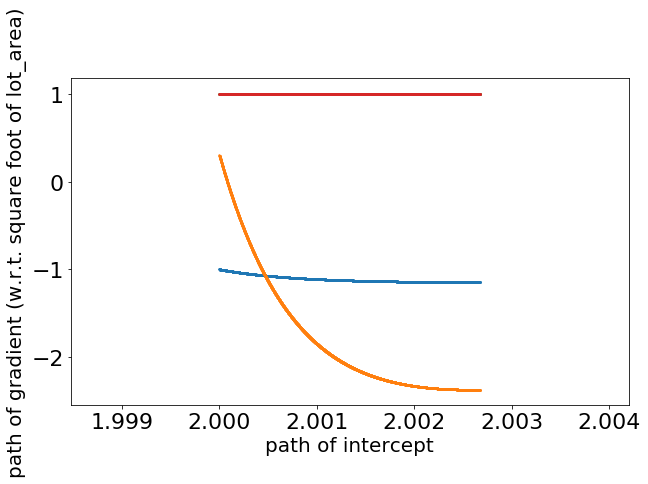

In [0]:
fig = plt.figure(figsize = (10, 6))
ax1 = fig.add_subplot(1, 1, 1)
ax1.scatter(beta_path[:, 0],  beta_path[:, 1], s=2)
ax1.scatter(beta_path[:, 0],  beta_path[:, 2], s=2)
ax1.scatter(beta_path[:, 0],  beta_path[:, 3], s=2)
ax1.scatter(beta_path[:, 0],  beta_path[:, 4], s=2)
_ = ax1.set_xlabel('path of intercept', fontsize=20)
_ = ax1.set_ylabel('path of gradient (w.r.t. square foot of lot_area)', fontsize=20)

In [0]:
# How much can the step size be increased before gradient descent starts to diverge?

In [0]:
n_iter = 100000 # number of interations
eta = 1e-5 # step size
tol = 3000 # tolerance

# initialise lists to score the path of beta and the path of the loss function
# this is with the expectation that it will hold our initial values through random selection of parameters, 
# then probably repeat the operation n times and store results of each of those iterations.
beta_path = np.zeros([(n_iter + 1),5])
loss_path = []

#len(beta_path) this gives a list with 1001 items or rows

# initialise
# our initial guess of the beta coefficients. 
# We take the y intercept to be the mean of y values and 
# gradient to be mean of x values, which, after adjustment, became o
beta = [0, 0,0,0,0]
# beta
# fill the first row of the beta path array with the initial estimates as stored in the beta
beta_path[0,:] = beta
#beta
# the loss function is then calculated based on these initial estimates
loss_this = fn_loss(x1,x2, y, beta[0], beta[1],beta[2],beta[3],beta[4])
#loss_this
# this value is stored to the empty list created above using np.append
loss_path.append(loss_this)
# loss_path
# calculate the gradient function as already defined
# it returns np.array([delta_0, delta_1])
g = fn_grad(x1, x2, y, beta[0], beta[1],beta[2],beta[3],beta[4])
#g
# add up the squared gradients
# this will help us define when the function is expected to stop
g_mag = np.sum(np.square(g))
#g_mag
# since our aim os to get a gradient of zero, we want to stop after achieving some degree of accuracy defined by our tolerance,
# even if it happens before we reach the specified number of iterations

for i in range(n_iter):
    if g_mag < tol:
        break
    
    g = fn_grad(x1, x2, y, beta[0], beta[1],beta[2],beta[3],beta[4])
    g_mag = np.sum(np.square(g))
    beta += -eta * g # update the parameters beta = beta -step_size*gradient
    loss_this = fn_loss(x1, x2, y, beta[0], beta[1],beta[2],beta[3],beta[4]) # calculate loss function of the updated parameters
    loss_path.append(loss_this) # appand this loss value to the empty list created earlier
    beta_path[i + 1, :] = beta
    if i % 100 == 0: # print the value of i at each 100th interval. i.e when modulus of 100 is zero
        print(i, g_mag)
        
beta_path = beta_path[0:(i + 1), :] # print 0:i+1 rows and all columns of the array beta_path

In [0]:
# This cell should output:
# Intercept: $178,909
# Slope: $9.3 per foot
print('Slope0: ${:,.0f}'.format(beta[0]))
print('Slope1: ${:,.1f} per foot'.format(beta[1]))
print('Slope2: ${:,.1f} per foot'.format(beta[2]))
print('Slope3: ${:,.1f} per foot'.format(beta[3]))
print('Slope4: ${:,.1f} per foot'.format(beta[4]))


Slope0: $67
Slope1: $-4.4 per foot
Slope2: $142,635.9 per foot
Slope3: $0.0 per foot
Slope4: $0.0 per foot


In [0]:
fig = plt.figure(figsize = (10, 6))
ax1 = fig.add_subplot(1, 1, 1)
ax1.scatter(beta_path[:, 0],  beta_path[:, 1], s=2)
_ = ax1.set_xlabel('path of intercept', fontsize=20)
_ = ax1.set_ylabel('path of gradient (w.r.t. square foot of lot_area)', fontsize=20)

In [0]:
n_iter = 100000 # number of interations
eta = 1e-5 # step size
tol = 3000 # tolerance

# initialise lists to score the path of beta and the path of the loss function
# this is with the expectation that it will hold our initial values through random selection of parameters, 
# then probably repeat the operation n times and store results of each of those iterations.
beta_path = np.zeros([(n_iter + 1),5])
loss_path = []

#len(beta_path) this gives a list with 1001 items or rows

# initialise
# our initial guess of the beta coefficients. 
# We take the y intercept to be the mean of y values and 
# gradient to be mean of x values, which, after adjustment, became o
beta = [0, 0,0,0,0]
# beta
# fill the first row of the beta path array with the initial estimates as stored in the beta
beta_path[0,:] = beta
#beta
# the loss function is then calculated based on these initial estimates
loss_this = fn_loss(x1,x2, y, beta[0], beta[1],beta[2],beta[3],beta[4])
#loss_this
# this value is stored to the empty list created above using np.append
loss_path.append(loss_this)
# loss_path
# calculate the gradient function as already defined
# it returns np.array([delta_0, delta_1])
g = fn_grad(x1, x2, y, beta[0], beta[1],beta[2],beta[3],beta[4])
#g
# add up the squared gradients
# this will help us define when the function is expected to stop
g_mag = np.sum(np.square(g))
#g_mag
# since our aim os to get a gradient of zero, we want to stop after achieving some degree of accuracy defined by our tolerance,
# even if it happens before we reach the specified number of iterations

for i in range(n_iter):
    if g_mag < tol:
        break
    
    g = fn_grad(x1, x2, y, beta[0], beta[1],beta[2],beta[3],beta[4])
    g_mag = np.sum(np.square(g))
    beta += -eta * g # update the parameters beta = beta -step_size*gradient
    loss_this = fn_loss(x1, x2, y, beta[0], beta[1],beta[2],beta[3],beta[4]) # calculate loss function of the updated parameters
    loss_path.append(loss_this) # appand this loss value to the empty list created earlier
    beta_path[i + 1, :] = beta
    if i % 100 == 0: # print the value of i at each 100th interval. i.e when modulus of 100 is zero
        print(i, g_mag)
        
beta_path = beta_path[0:(i + 1), :] # print 0:i+1 rows and all columns of the array beta_path

In [0]:
# This cell should output:
# Intercept: $178,909
# Slope: $9.3 per foot
print('Slope0: ${:,.0f}'.format(beta[0]))
print('Slope1: ${:,.1f} per foot'.format(beta[1]))
print('Slope2: ${:,.1f} per foot'.format(beta[2]))
print('Slope3: ${:,.1f} per foot'.format(beta[3]))
print('Slope4: ${:,.1f} per foot'.format(beta[4]))


Slope0: $67
Slope1: $-4.4 per foot
Slope2: $142,635.9 per foot
Slope3: $0.0 per foot
Slope4: $0.0 per foot


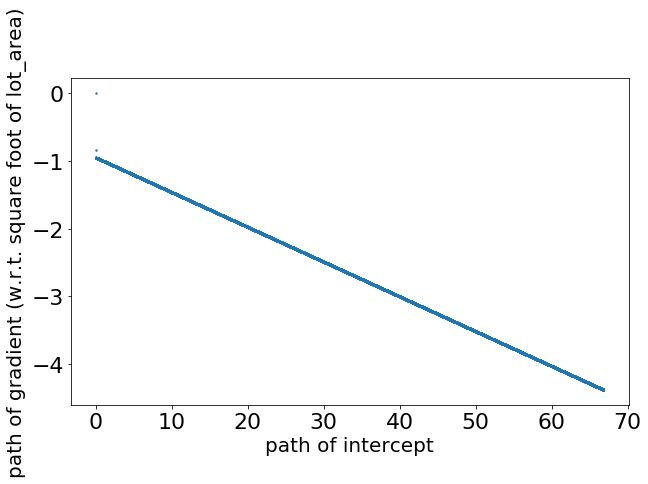

In [0]:
fig = plt.figure(figsize = (10, 6))
ax1 = fig.add_subplot(1, 1, 1)
ax1.scatter(beta_path[:, 0],  beta_path[:, 1], s=2)
_ = ax1.set_xlabel('path of intercept', fontsize=20)
_ = ax1.set_ylabel('path of gradient (w.r.t. square foot of lot_area)', fontsize=20)